**Title of the Project:  Multi-Method AI System for Diabetes Risk Prediction**

Team Number: Group 6

Team Leader/Representative: Ahmed Eldahmy

Full Names of Team Members:
1. Ahmed Eldahmy
2. Deepika Shrestha
3. Francisco Monarrez Felix

Member B: Deepika
Assigned Algorithms: Logistic Regression & Random Forest Classifier
Logistic Regression:
Random Forest Classifier:




In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import warnings
import joblib
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
RANDOM_STATE = 42

# ---------------------------------------------------------
# 1. Install dependencies (if needed)
# ---------------------------------------------------------
# pip install xgboost scikit-learn pandas joblib

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer # Added SimpleImputer import
from sklearn.pipeline import Pipeline # Added Pipeline import

# MAchine learning models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
)
from xgboost import XGBClassifier

# model selection & tuning
from sklearn.model_selection import train_test_split, GridSearchCV , RandomizedSearchCV

from scipy.stats import uniform, randint


#Evaluation metrics
from sklearn.metrics import (
    confusion_matrix, ConfusionMatrixDisplay, accuracy_score,
    precision_score, recall_score, f1_score, roc_auc_score
)


# Feature selection
from sklearn.feature_selection import RFE , SelectKBest, f_classif


# sampling methods

from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss

# Pipelines
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.pipeline import Pipeline as SklearnPipeline

IMPORT THE CDC DIABETES HEALTH INDICATOR DATA

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("alexteboul/diabetes-health-indicators-dataset")

print("Path to dataset files:", path)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# The 'path' variable is available from previous cell execution (wW1GmNFZvFH_)
# Its value is '/root/.cache/kagglehub/datasets/alexteboul/diabetes-health-indicators-dataset/versions/1'
file_name = 'diabetes_binary_health_indicators_BRFSS2015.csv'
full_file_path1 = os.path.join(path, file_name)
df = pd.read_csv(full_file_path1)
df.info()

display(df.head())
summerize = df.describe()
print(summerize)

Using Colab cache for faster access to the 'diabetes-health-indicators-dataset' dataset.
Path to dataset files: /kaggle/input/diabetes-health-indicators-dataset
/kaggle/input/diabetes-health-indicators-dataset/diabetes_binary_5050split_health_indicators_BRFSS2015.csv
/kaggle/input/diabetes-health-indicators-dataset/diabetes_binary_health_indicators_BRFSS2015.csv
/kaggle/input/diabetes-health-indicators-dataset/diabetes_012_health_indicators_BRFSS2015.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke   

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


       Diabetes_binary         HighBP       HighChol      CholCheck  \
count    253680.000000  253680.000000  253680.000000  253680.000000   
mean          0.139333       0.429001       0.424121       0.962670   
std           0.346294       0.494934       0.494210       0.189571   
min           0.000000       0.000000       0.000000       0.000000   
25%           0.000000       0.000000       0.000000       1.000000   
50%           0.000000       0.000000       0.000000       1.000000   
75%           0.000000       1.000000       1.000000       1.000000   
max           1.000000       1.000000       1.000000       1.000000   

                 BMI         Smoker         Stroke  HeartDiseaseorAttack  \
count  253680.000000  253680.000000  253680.000000         253680.000000   
mean       28.382364       0.443169       0.040571              0.094186   
std         6.608694       0.496761       0.197294              0.292087   
min        12.000000       0.000000       0.000000      

Diabetes participants- 13%, Non-Diabetes participants- 87%

In [3]:
possible_targets = [c for c in df.columns if 'diabetes' in c.lower()]
target_col = 'Diabetes_binary' if 'Diabetes_binary' in df.columns else possible_targets[0]
...
print(df[target_col].value_counts(normalize=True))

Diabetes_binary
0.0    0.860667
1.0    0.139333
Name: proportion, dtype: float64


In [4]:
from sklearn.pipeline import Pipeline # Add this import
RANDOM_STATE = 42

# Separate features (X) and target (y)
X = df.drop(columns=[target_col])
y = df[target_col]

# Split data into training and testing sets (stratified to maintain class ratio)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=RANDOM_STATE,
    stratify=y
)

print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")


# Since most features are binary (0 or 1) but some might be continuous (like BMI, MentHlth, PhysHlth),
# we treat all as numerical for scaling/imputation purposes.

# 1. Imputer: Fill any missing values with the median
imputer_step = ('imputer', SimpleImputer(strategy='median'))

# 2. Scaler: Standardize the features (important for Logistic Regression)
scaler_step = ('scaler', StandardScaler())

# 3. Dimensionality Reduction (PCA): Use only on non-target features
pca_step = ('pca', PCA(n_components=0.95, random_state=RANDOM_STATE)) # Keep 95% of variance

# Create the full preprocessing pipeline
preprocessor = Pipeline(steps=[
    imputer_step,
    scaler_step,
    pca_step  # Apply PCA only on the final training set
])

X_train shape: (202944, 21), y_train shape: (202944,)
X_test shape: (50736, 21), y_test shape: (50736,)


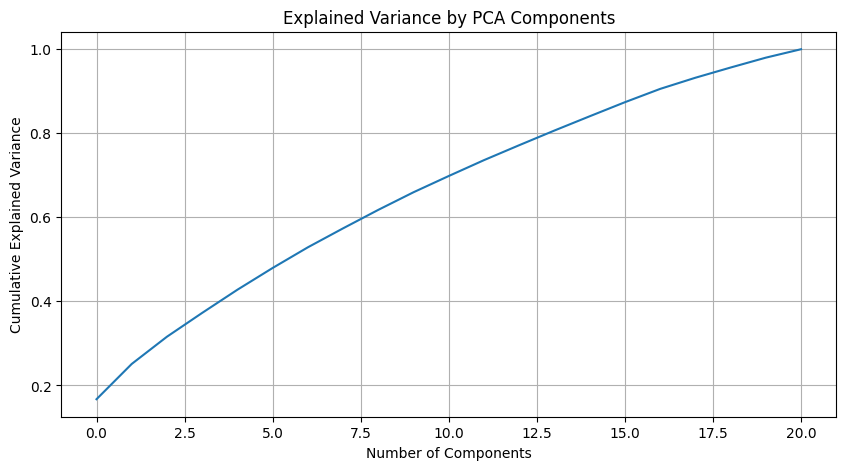

In [24]:
features = df.drop(columns=['Diabetes_binary'])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)
pca = PCA()
pca_components = pca.fit_transform(X_scaled)
plt.figure(figsize=(10,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance by PCA Components")
plt.grid(True)
plt.show()

In [25]:
# @title Default title text
#------------Part 3: Hyperparameter Selection (15%)---------------------------------------------
#------------Part 4: Initial Model Training (20%) ---------------------------------------------

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from xgboost import XGBClassifier

#X = pd.DataFrame(data.data, columns=data.feature_names)
#y = pd.Series(data.target)  # 0 = malignant, 1 = benign


# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Initial model
model_initial = XGBClassifier(
    max_depth=4,
    learning_rate=0.1,
    n_estimators=200,
    eval_metric="logloss",
    use_label_encoder=False
)

model_initial.fit(X_train, y_train)

# Predictions and evaluation
y_pred = model_initial.predict(X_test)
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

acc, f1


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [05:28:47] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


(0.8659728792179123, 0.25715534192702644)

3. Random Forest Implementation
This code follows the same structure as the LR implementation for training, tuning, and evaluation.

RF Modeling Pipeline and Hyperparameter Tuning

Using Colab cache for faster access to the 'diabetes-health-indicators-dataset' dataset.
Running fast Random Forest search...
Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.12/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


✔ Best model: Pipeline(steps=[('smote', SMOTE(random_state=42)),
                ('classifier',
                 RandomForestClassifier(max_depth=20, min_samples_leaf=2,
                                        min_samples_split=5, n_estimators=200,
                                        n_jobs=-1, random_state=42))])

--- FAST Random Forest Performance Metrics ---
Accuracy: 0.8519
Precision: 0.4541
Recall (Sensitivity): 0.3098
F1-Score: 0.3683
ROC-AUC: 0.8157


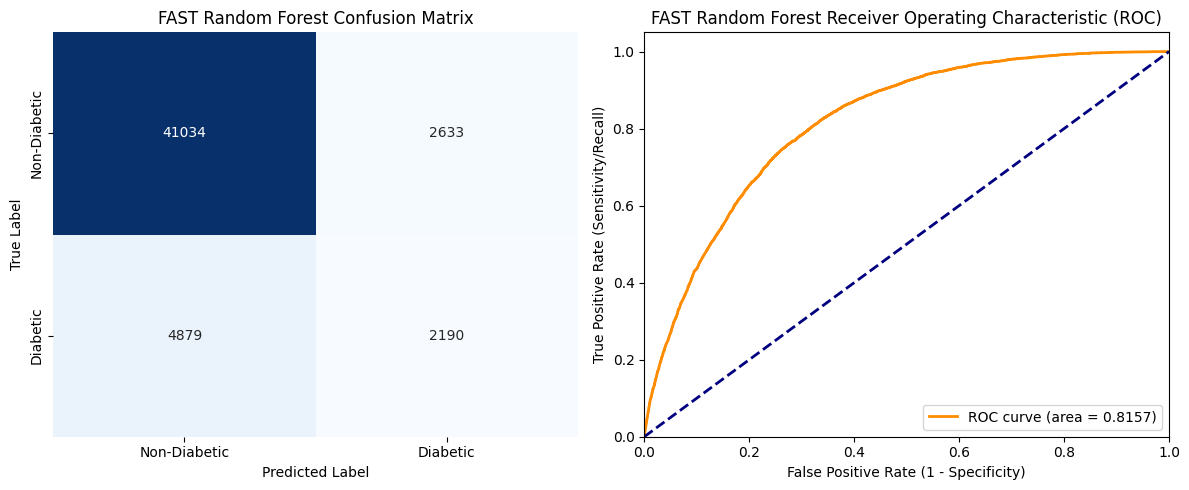

In [31]:
import kagglehub
import os
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, roc_curve, auc
)
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (redundant if previous cells run, but ensures self-containment)
path = kagglehub.dataset_download("alexteboul/diabetes-health-indicators-dataset")
file_name = 'diabetes_binary_health_indicators_BRFSS2015.csv'
full_file_path1 = os.path.join(path, file_name)
df = pd.read_csv(full_file_path1)

# Define target column (redundant if previous cells run, but ensures self-containment)
possible_targets = [c for c in df.columns if 'diabetes' in c.lower()]
target_col = 'Diabetes_binary' if 'Diabetes_binary' in df.columns else possible_targets[0]

# Split data into training (80%) and testing (20%) sets.
# Use stratify=y to ensure the class proportions (imbalance) are maintained in both sets.
X = df.drop(columns=[target_col])
y = df[target_col]
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=RANDOM_STATE,
    stratify=y
)

def evaluate_model(model, X_test, y_test, model_name):
    """Generates predictions, metrics, confusion matrix, and ROC curve."""

    # Predictions
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    # Metrics
    metrics = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall (Sensitivity)': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred),
        'ROC-AUC': roc_auc_score(y_test, y_proba)
    }

    print(f"\n--- {model_name} Performance Metrics ---")
    for name, value in metrics.items():
        print(f"{name}: {value:.4f}")

    # Confusion Matrix Plot
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Non-Diabetic', 'Diabetic'],
                yticklabels=['Non-Diabetic', 'Diabetic'])
    plt.title(f'{model_name} Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')

    # ROC Curve Plot
    fpr, tpr, thresholds = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)

    plt.subplot(1, 2, 2)
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate (1 - Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity/Recall)')
    plt.title(f'{model_name} Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.tight_layout()
    plt.show()

    return metrics

# 1. Random Forest model
rf_model = RandomForestClassifier(random_state=RANDOM_STATE, n_jobs=-1)

# 2. Simple pipeline → SMOTE + RF ONLY (FASTEST)
rf_pipeline = ImbPipeline(steps=[
    ('smote', SMOTE(random_state=RANDOM_STATE)),
    ('classifier', rf_model)
])

# 3. Small, efficient hyperparameter search space
param_dist_rf = {
    'classifier__n_estimators': [100, 200],      # reduced for speed
    'classifier__max_depth': [10, 20],           # avoid huge trees
    'classifier__min_samples_split': [2, 5],
    'classifier__min_samples_leaf': [1, 2],
}

# 4. Stratified 3-fold CV (FASTER than 5-fold)
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=RANDOM_STATE)

# 5. Fast Randomized Search
rf_search = RandomizedSearchCV(
    estimator=rf_pipeline,
    param_distributions=param_dist_rf,
    n_iter=10,            # VERY FAST
    scoring='roc_auc',
    cv=cv,
    n_jobs=-1,
    verbose=1,
    random_state=RANDOM_STATE
)

# 6. Fit the model
print("Running fast Random Forest search...")
rf_search.fit(X_train, y_train)

best_rf = rf_search.best_estimator_
print("✔ Best model:", best_rf)

# 7. Evaluate
rf_metrics = evaluate_model(best_rf, X_test, y_test, "FAST Random Forest")


Standard Logistic Regression

Starting Logistic Regression Randomized Search...
Fitting 5 folds for each of 50 candidates, totalling 250 fits

Best LR Model found:
Pipeline(steps=[('smote', SMOTE(random_state=42)),
                ('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler()),
                ('pca', PCA(n_components=0.95, random_state=42)),
                ('classifier',
                 LogisticRegression(C=np.float64(0.08787658410143283),
                                    penalty='l1', random_state=42,
                                    solver='liblinear'))])

--- Logistic Regression (Standard PCA) Performance Metrics ---
Accuracy: 0.7249
Precision: 0.3033
Recall (Sensitivity): 0.7514
F1-Score: 0.4322
ROC-AUC: 0.8106


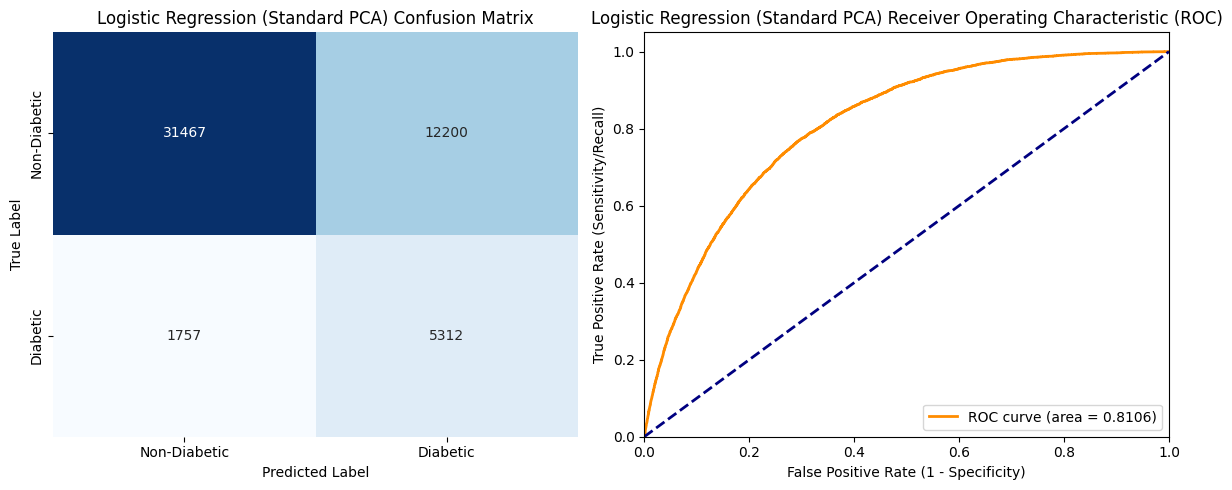

In [27]:
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from scipy.stats import uniform

import pandas as pd
import os
import kagglehub
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline



# 1. Define the Logistic Regression Model
lr_model = LogisticRegression(random_state=RANDOM_STATE, max_iter=100)

# 2. Create the full ImbPipeline (SMOTE, Standard Preprocessing, LR)
# The 'preprocessor' pipeline steps need to be inserted directly into the ImbPipeline.
lr_pipeline = ImbPipeline(steps=[
    ('smote', SMOTE(random_state=RANDOM_STATE)),
    imputer_step,
    scaler_step,
    pca_step,
    ('classifier', lr_model)
])

# 3. Define the Hyperparameter Search Space
# C: Inverse of regularization strength; smaller values specify stronger regularization.
# penalty: 'l1' (Lasso) or 'l2' (Ridge) regularization.
# solver: 'liblinear' supports both l1 and l2 penalties
param_grid_lr = {
    'classifier__C': uniform(loc=0.01, scale=100),
    'classifier__penalty': ['l2', 'l1'],
    'classifier__solver': ['liblinear']
}

# Define CV
cv_folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

# 4. Randomized Search with Stratified Cross-Validation
lr_search = RandomizedSearchCV(
    estimator=lr_pipeline,
    param_distributions=param_grid_lr,
    n_iter=50,
    scoring='roc_auc',
    cv=cv_folds,
    verbose=1,
    n_jobs=-1,
    random_state=RANDOM_STATE
)

# 5. Train the model
print("Starting Logistic Regression Randomized Search...")
lr_search.fit(X_train, y_train)

best_lr_model = lr_search.best_estimator_
print("\nBest LR Model found:")
print(best_lr_model)

# 6. Evaluate the Best Model
lr_metrics = evaluate_model(best_lr_model, X_test, y_test, "Logistic Regression (Standard PCA)")

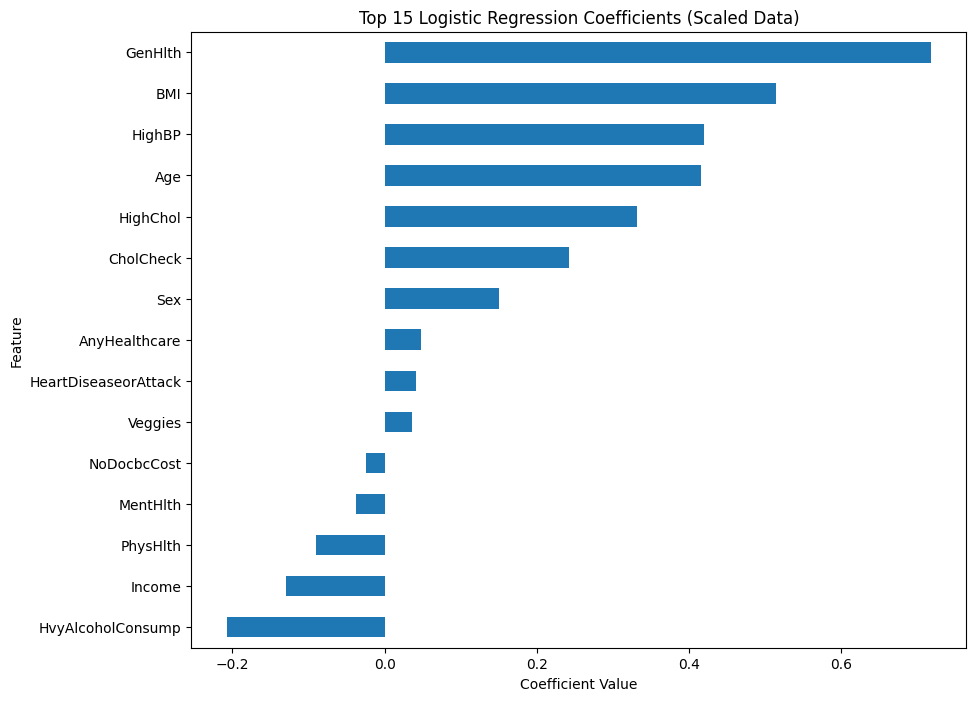

In [28]:
# Extract the underlying LogisticRegression model from the best pipeline
best_lr_clf = best_lr_model.named_steps['classifier']

# WARNING: Coefficients are for the PCA components, which are linear combinations
# of the original features. This makes direct interpretation difficult.
# To properly interpret LR, we must retrain the model *without* PCA, but with only scaling.

# Simplified pipeline for interpretability (Scaler -> LR, no PCA)
lr_interpret_pipeline = ImbPipeline(steps=[
    ('smote', SMOTE(random_state=RANDOM_STATE)),
    imputer_step, # Insert individual imputer step
    scaler_step,  # Insert individual scaler step
    ('classifier', lr_model) # Use LR with best C/penalty from search
])
# Set best hyperparameters found earlier
lr_interpret_pipeline.set_params(
    classifier__C=lr_search.best_params_['classifier__C'],
    classifier__penalty=lr_search.best_params_['classifier__penalty'],
    classifier__solver=lr_search.best_params_['classifier__solver']
)

lr_interpret_pipeline.fit(X_train, y_train)
lr_interp_clf = lr_interpret_pipeline.named_steps['classifier']

# Extract scaled feature names and coefficients
feature_names = X_train.columns
coefficients = pd.Series(lr_interp_clf.coef_[0], index=feature_names)
coefficients_abs = coefficients.abs().sort_values(ascending=False)

# Visualize Coefficients
plt.figure(figsize=(10, 8))
coefficients[coefficients_abs.index[:15]].sort_values(ascending=True).plot(kind='barh')
plt.title('Top 15 Logistic Regression Coefficients (Scaled Data)')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()

# Save model for later use (optional)
# joblib.dump(best_lr_model, 'best_logistic_regression_model.joblib')


RF Interpretability: Feature Importance

(GROUP-WISE PCA + LOGISTIC REGRESSION)

Group 1 — Cardiometabolic Comorbidities

HighBP, HighChol, CholCheck, Stroke, HeartDiseaseorAttack,
BMI, GenHlth, PhysHlth, DiffWalk

Group 2 — Mental & Behavioral Health

MentHlth, HvyAlcoholConsump, Smoker

Group 3 — Lifestyle Behaviors

PhysActivity, Fruits, Veggies

Group 4 — Healthcare Access

AnyHealthcare, NoDocbcCost

Group 5 — Sociodemographic

Sex, Age, Education, Income

1. Defining Feature Groups and Custom PCA Transformer

In [6]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline as SklearnPipeline # Correct import for Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE # Assuming SMOTE is used from imblearn
from sklearn.model_selection import train_test_split
import pandas as pd # Import pandas for DataFrameConverter
from sklearn.base import BaseEstimator, TransformerMixin # Import for custom transformer

RANDOM_STATE = 42 # Define RANDOM_STATE

# Define the feature groups
GROUP_MAPPING = {
    'Cardiometabolic': ['HighBP', 'HighChol', 'CholCheck', 'Stroke', 'HeartDiseaseorAttack', 'BMI', 'GenHlth', 'PhysHlth', 'DiffWalk'],
    'Mental_Behavioral': ['MentHlth', 'HvyAlcoholConsump', 'Smoker'],
    'Lifestyle': ['PhysActivity', 'Fruits', 'Veggies'],
    'Healthcare_Access': ['AnyHealthcare', 'NoDocbcCost'],
    'Sociodemographic': ['Sex', 'Age', 'Education', 'Income']
}

# Create a list of tuples for the ColumnTransformer
# Each step applies: Scaling -> PCA(n_components=0.95) to its specific group
transformers = []
for name, features_list in GROUP_MAPPING.items():
    # Only scale and apply PCA if the group has features
    if features_list:
        group_pipeline = SklearnPipeline(steps=[
            # 1. Scaling is crucial before PCA
            ('scaler', StandardScaler()),
            # 2. PCA: retaining 95% of the variance within that feature group
            ('pca', PCA(n_components=0.95, random_state=RANDOM_STATE))
        ])
        transformers.append((name + '_pca', group_pipeline, features_list))

# Create the full Group-Wise PCA Preprocessor
group_pca_preprocessor = ColumnTransformer(
    transformers=transformers,
    remainder='drop',  # Changed from 'passthrough' to 'drop' as we only want PCA features
    n_jobs=-1
)

# -----------------------------
# 1. Apply Group-Wise PCA to create df_group_pca
# -----------------------------
# Separate features (X_initial_features) from the target (y_target)
target_col = 'Diabetes_binary' # Ensure target_col is defined for this context
X_initial_features = df.drop(columns=[target_col])
y_target = df[target_col] # Keep original target for later splitting

# Fit and transform the feature data using the preprocessor
X_group_pca_transformed = group_pca_preprocessor.fit_transform(X_initial_features)

# Convert the transformed array back to a DataFrame
# Get the names of PCA components for each group
pca_feature_names = []
for name, features_list in GROUP_MAPPING.items():
    if features_list:
        # Get the fitted PCA estimator from the named_transformers_
        # n_components_ is only available after fit_transform has been called on the preprocessor
        fitted_pca_estimator = group_pca_preprocessor.named_transformers_[name + '_pca'].named_steps['pca']
        n_components = fitted_pca_estimator.n_components_
        pca_feature_names.extend([f"{name}_PCA{i+1}" for i in range(n_components)])

# Create DataFrame
df_group_pca = pd.DataFrame(X_group_pca_transformed, columns=pca_feature_names)

# -----------------------------
# 2. Define Features and Target (using the new df_group_pca)
# -----------------------------
X = df_group_pca  # Groupwise PCA features
y = y_target      # Use the target separated earlier

# -----------------------------
# 3. Train-Test Split
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=RANDOM_STATE, stratify=y
)

# -----------------------------
# 4. Optional: Handle Class Imbalance
# -----------------------------
smote = SMOTE(random_state=RANDOM_STATE)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# -----------------------------
# 5. Logistic Regression
# -----------------------------
lr_model = LogisticRegression(random_state=RANDOM_STATE, max_iter=100)
lr_model.fit(X_train_res, y_train_res)
y_pred_lr = lr_model.predict(X_test)
y_prob_lr = lr_model.predict_proba(X_test)[:,1]

# -----------------------------
# 6. Random Forest
# -----------------------------
rf_model = RandomForestClassifier(random_state=RANDOM_STATE, n_estimators=100)
rf_model.fit(X_train_res, y_train_res)
y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:,1]

# -----------------------------
# 7. Model Performance Metrics
# -----------------------------
def print_metrics(y_true, y_pred, y_prob, model_name):
    print(f"--- {model_name} Performance Metrics ---")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision: {precision_score(y_true, y_pred):.4f}")
    print(f"Recall (Sensitivity): {recall_score(y_true, y_pred):.4f}")
    print(f"F1-Score: {f1_score(y_true, y_pred):.4f}")
    print(f"ROC-AUC: {roc_auc_score(y_true, y_prob):.4f}")
    print("\n")

print_metrics(y_test, y_pred_lr, y_prob_lr, "Logistic Regression")
print_metrics(y_test, y_pred_rf, y_prob_rf, "Random Forest")



--- Logistic Regression Performance Metrics ---
Accuracy: 0.7283
Precision: 0.3074
Recall (Sensitivity): 0.7581
F1-Score: 0.4375
ROC-AUC: 0.8172


--- Random Forest Performance Metrics ---
Accuracy: 0.8273
Precision: 0.3911
Recall (Sensitivity): 0.4298
F1-Score: 0.4096
ROC-AUC: 0.7918




In [7]:

# Ensure the utility function 'evaluate_model' and constants like RANDOM_STATE exist from the previous step.

# --------------------------------------------------------------------------------
# Shared Configuration
# ----------------------------------------------------------
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedKFold
from sklearn.base import BaseEstimator, TransformerMixin # Import for custom transformer
import pandas as pd # Import pandas for DataFrameConverter
from imblearn.over_sampling import SMOTE # Import SMOTE as it's used in the pipeline

# Custom transformer to convert NumPy array back to DataFrame
class DataFrameConverter(BaseEstimator, TransformerMixin):
    def __init__(self, columns=None):
        self.columns = columns

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        if isinstance(X, pd.DataFrame):
            return X
        return pd.DataFrame(X, columns=self.columns)

# Define CV
cv_folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)


# Replace the simple preprocessor from previous code with the group-wise preprocessor
group_wise_pipeline_steps = [
    ('smote', SMOTE(random_state=RANDOM_STATE)),
    ('df_converter', DataFrameConverter(columns=X_initial_features.columns)), # Add this step to convert SMOTE output to DataFrame
    ('preprocessor', group_pca_preprocessor),
]

2. Group-Wise PCA Implementation with Classifiers

In [12]:
# -----------------------------------------------
# 8. Confusion Matrix & ROC Curve Visualization
# -----------------------------------------------
from sklearn.metrics import roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

def plot_confusion_matrix(y_true, y_pred, model_name):
    """Plots the confusion matrix for a given model."""
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues', values_format='d')
    plt.title(f"{model_name} - Confusion Matrix")
    plt.show()


def plot_roc_curve(y_true, y_prob, model_name):
    """Plots ROC curve for the given probability predictions."""
    fpr, tpr, _ = roc_curve(y_true, y_prob)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.title(f"{model_name} - ROC Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right")
    plt.grid()
    plt.show()


In [14]:
# -------------------------------------------------
# 9. Train & Evaluate Function for Any Model
# -------------------------------------------------
def train_and_evaluate(model, X_train, y_train, X_test, y_test, model_name):
    """
    Trains the model, predicts on test data, computes all metrics,
    and plots confusion matrix & ROC curve.
    """

    # ---- Train ----
    model.fit(X_train, y_train)

    # ---- Predictions ----
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    # ---- Print metrics ----
    print(f"====== {model_name} Evaluation ======")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred):.4f}")
    print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")
    print(f"ROC-AUC: {roc_auc_score(y_test, y_prob):.4f}")
    print()

    # ---- Confusion Matrix ----
    plot_confusion_matrix(y_test, y_pred, model_name)

    # ---- ROC Curve ----
    plot_roc_curve(y_test, y_prob, model_name)

    return model


====== Logistic Regression (Group PCA) Evaluation ======
Accuracy: 0.7283
Precision: 0.3074
Recall: 0.7581
F1 Score: 0.4375
ROC-AUC: 0.8172



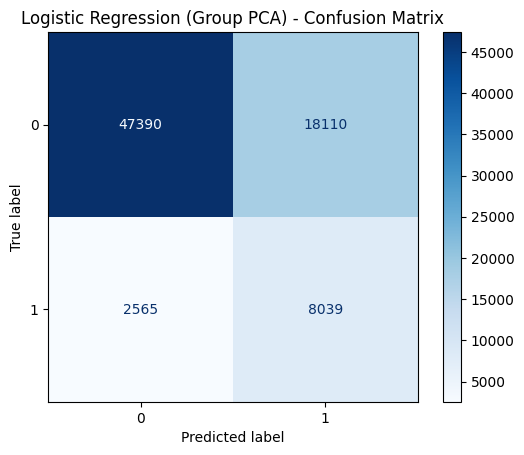

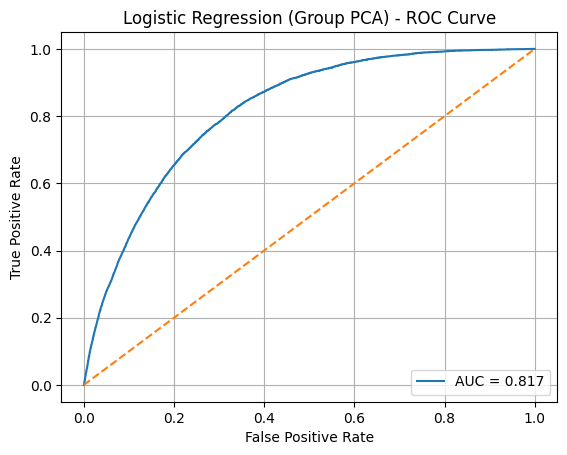

====== Random Forest (Group PCA) Evaluation ======
Accuracy: 0.8273
Precision: 0.3911
Recall: 0.4298
F1 Score: 0.4096
ROC-AUC: 0.7918



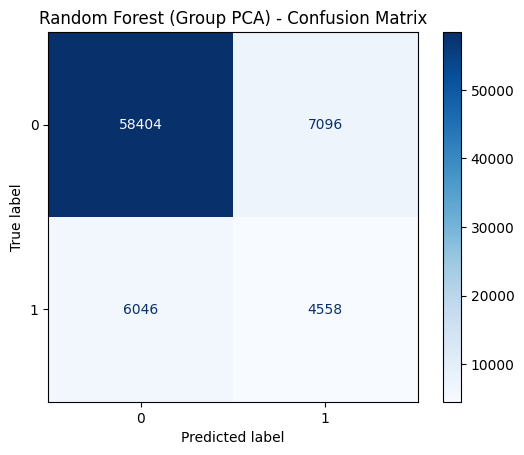

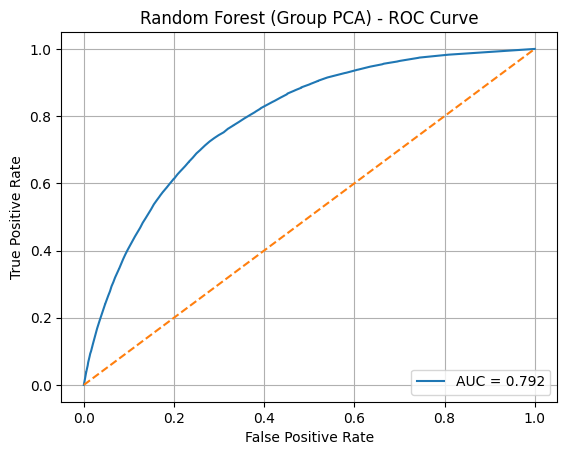

RandomForestClassifier(random_state=42)

In [15]:
# Logistic Regression Evaluation
train_and_evaluate(
    lr_model, X_train_res, y_train_res, X_test, y_test,
    "Logistic Regression (Group PCA)"
)

# Random Forest Evaluation
train_and_evaluate(
    rf_model, X_train_res, y_train_res, X_test, y_test,
    "Random Forest (Group PCA)"
)


In [19]:
# ---------------------------------------------------
# Extract Logistic Regression Coefficients
# ---------------------------------------------------

import numpy as np
import matplotlib.pyplot as plt

def extract_lr_coefficients(model, feature_names):
    """
    Extracts logistic regression coefficients with feature names.
    Returns a sorted DataFrame for easy interpretation.
    """
    coef = model.coef_[0]   # 1D array of coefficients
    df_coef = pd.DataFrame({
        'Feature': feature_names,
        'Coefficient': coef
    })

    # Sort by absolute coefficient magnitude
    df_coef['AbsCoef'] = df_coef['Coefficient'].abs()
    df_coef = df_coef.sort_values(by='AbsCoef', ascending=False)

    return df_coef

# Run extraction
df_lr_coef = extract_lr_coefficients(lr_model, pca_feature_names)
df_lr_coef.head(15)


,Feature,Coefficient,AbsCoef
0,Cardiometabolic_PCA1,0.655184,0.655184
18,Sociodemographic_PCA3,0.434689,0.434689
1,Cardiometabolic_PCA2,0.397897,0.397897
2,Cardiometabolic_PCA3,-0.381461,0.381461
7,Cardiometabolic_PCA8,-0.262820,0.262820
16,Sociodemographic_PCA1,-0.237548,0.237548
17,Sociodemographic_PCA2,0.202053,0.202053
4,Cardiometabolic_PCA5,0.182573,0.182573
10,Mental_Behavioral_PCA3,0.125197,0.125197
8,Mental_Behavioral_PCA1,-0.115860,0.115860


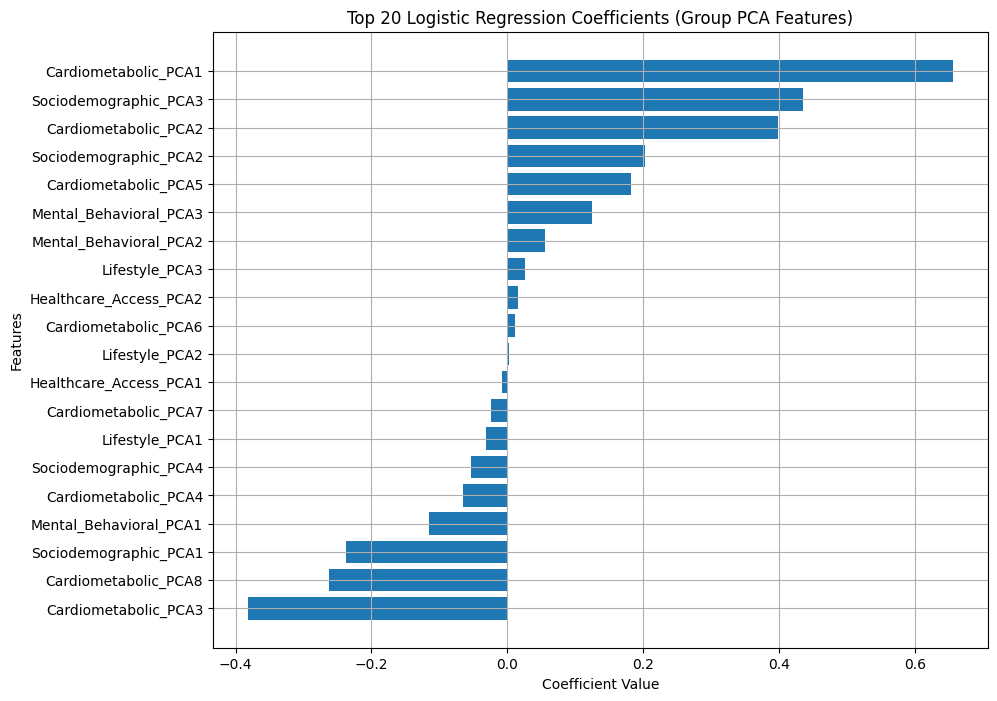

In [20]:
# ---------------------------------------------------
# Plot Logistic Regression Coefficients
# ---------------------------------------------------

def plot_lr_coefficients(df_coef, top_n=20):
    """
    Plots the top N logistic regression coefficients.
    """
    df_plot = df_coef.head(top_n).sort_values('Coefficient')

    plt.figure(figsize=(10, 8))
    plt.barh(df_plot['Feature'], df_plot['Coefficient'])
    plt.title(f"Top {top_n} Logistic Regression Coefficients (Group PCA Features)")
    plt.xlabel("Coefficient Value")
    plt.ylabel("Features")
    plt.grid(True)
    plt.show()


plot_lr_coefficients(df_lr_coef, top_n=20)


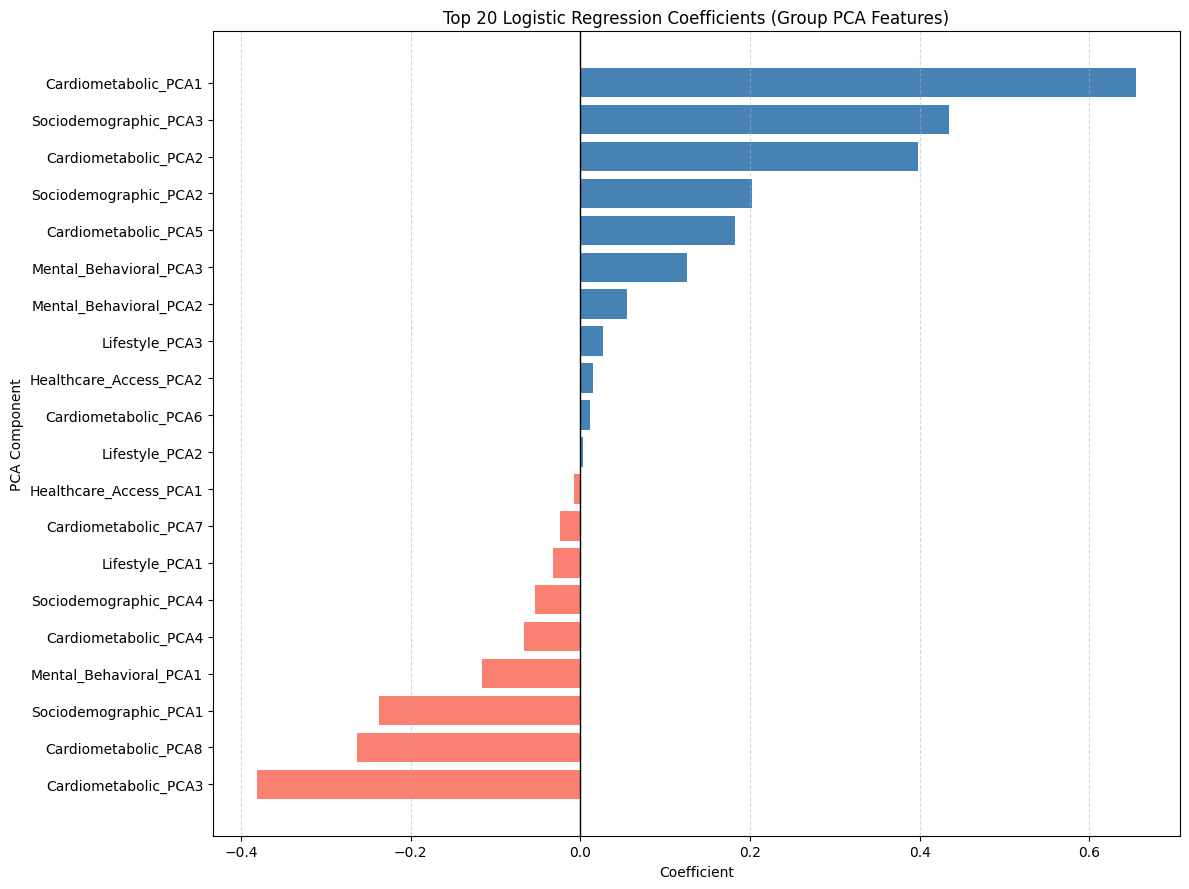

In [23]:
def plot_lr_coefficients_enhanced(df_coef, top_n=20):
    df_plot = df_coef.head(top_n).sort_values("Coefficient")

    plt.figure(figsize=(12, 9))

    colors = df_plot["Coefficient"].apply(
        lambda x: "steelblue" if x > 0 else "salmon"
    )

    plt.barh(df_plot["Feature"], df_plot["Coefficient"], color=colors)
    plt.axvline(0, color="black", linewidth=1)

    plt.title(f"Top {top_n} Logistic Regression Coefficients (Group PCA Features)")
    plt.xlabel("Coefficient")
    plt.ylabel("PCA Component")
    plt.grid(axis="x", linestyle="--", alpha=0.5)
    plt.tight_layout()
    plt.show()

plot_lr_coefficients_enhanced(df_lr_coef, top_n=20)


In [25]:
# -------------------------
# Get PCA loadings for each group
# -------------------------

pca_loadings = {}

for group, features in GROUP_MAPPING.items():
    pca_model = group_pca_preprocessor.named_transformers_[group + '_pca'].named_steps['pca']
    loadings = pd.DataFrame(
        pca_model.components_,
        columns=features
    )
    pca_loadings[group] = loadings


In [26]:
def explain_top_pca_components(df_coef, n=5):
    top_components = df_coef.head(n)['Feature']

    for comp in top_components:
        group = comp.split("_PCA")[0]         # e.g., Cardiometabolic
        comp_idx = int(comp.split("PCA")[1]) - 1

        load = pca_loadings[group].iloc[comp_idx]
        load_sorted = load.abs().sort_values(ascending=False)

        print(f"\n🔹 {comp} — top contributing features:")
        print(load_sorted.head(5))


In [27]:
explain_top_pca_components(df_lr_coef, n=5)



🔹 Cardiometabolic_PCA1 — top contributing features:
GenHlth                 0.480618
DiffWalk                0.437656
PhysHlth                0.423224
HighBP                  0.343090
HeartDiseaseorAttack    0.301684
Name: 0, dtype: float64

🔹 Sociodemographic_PCA3 — top contributing features:
Age          0.944709
Education    0.263557
Income       0.186361
Sex          0.057721
Name: 2, dtype: float64

🔹 Cardiometabolic_PCA2 — top contributing features:
HighChol     0.519803
CholCheck    0.451241
HighBP       0.438288
PhysHlth     0.412524
DiffWalk     0.300053
Name: 1, dtype: float64

🔹 Cardiometabolic_PCA3 — top contributing features:
Stroke                  0.618900
BMI                     0.607417
HeartDiseaseorAttack    0.462660
HighBP                  0.105472
GenHlth                 0.101403
Name: 2, dtype: float64

🔹 Cardiometabolic_PCA8 — top contributing features:
DiffWalk    0.815324
GenHlth     0.492397
PhysHlth    0.293050
Stroke      0.048916
HighChol    0.041562
Name:

In [22]:
# --------------------------------------------
# Build combined table: LR Coef + PCA loadings
# --------------------------------------------

# Define pca_loadings dictionary
pca_loadings = {}
for name, features_list in GROUP_MAPPING.items():
    if features_list:
        # Access the fitted PCA estimator from the named_transformers_
        # This will be a Pipeline (scaler, pca) from the ColumnTransformer
        group_pipeline_fitted = group_pca_preprocessor.named_transformers_[name + '_pca']
        # Access the PCA step within this pipeline
        fitted_pca_estimator = group_pipeline_fitted.named_steps['pca']
        # Get the components (loadings)
        loadings = fitted_pca_estimator.components_
        # Create a DataFrame for these loadings
        # Rows are original features, columns are PCA components
        pca_loadings[name] = pd.DataFrame(loadings.T,
                                         index=features_list,
                                         columns=[f"{name}_PCA{i+1}" for i in range(loadings.shape[0])])


combined_rows = []

top_n = 20  # number of components to include
top_components = df_lr_coef.head(top_n)

for idx, row in top_components.iterrows():
    comp_name = row['Feature']
    coef = row['Coefficient']
    group = comp_name.split("_PCA")[0]
    comp_idx = int(comp_name.split("PCA")[1]) - 1

    # PCA loadings
    load = pca_loadings[group].iloc[:, comp_idx] # Select the column corresponding to the PCA component
    top_features = load.abs().sort_values(ascending=False).head(5)

    combined_rows.append({
        "PCA Component": comp_name,
        "LR Coefficient": coef,
        "Top Contributing Features": ", ".join(top_features.index),
        "Group": group
    })

df_combined_table = pd.DataFrame(combined_rows)
df_combined_table

,PCA Component,LR Coefficient,Top Contributing Features,Group
0,Cardiometabolic_PCA1,0.655184,"GenHlth, DiffWalk, PhysHlth, HighBP, HeartDise...",Cardiometabolic
1,Sociodemographic_PCA3,0.434689,"Age, Education, Income, Sex",Sociodemographic
2,Cardiometabolic_PCA2,0.397897,"HighChol, CholCheck, HighBP, PhysHlth, DiffWalk",Cardiometabolic
3,Cardiometabolic_PCA3,-0.381461,"Stroke, BMI, HeartDiseaseorAttack, HighBP, Gen...",Cardiometabolic
4,Cardiometabolic_PCA8,-0.262820,"DiffWalk, GenHlth, PhysHlth, Stroke, HighChol",Cardiometabolic
5,Sociodemographic_PCA1,-0.237548,"Income, Education, Age, Sex",Sociodemographic
6,Sociodemographic_PCA2,0.202053,"Sex, Education, Age, Income",Sociodemographic
7,Cardiometabolic_PCA5,0.182573,"Stroke, BMI, HighChol, PhysHlth, CholCheck",Cardiometabolic
8,Mental_Behavioral_PCA3,0.125197,"Smoker, HvyAlcoholConsump, MentHlth",Mental_Behavioral
9,Mental_Behavioral_PCA1,-0.115860,"Smoker, HvyAlcoholConsump, MentHlth",Mental_Behavioral


B. Random Forest with Group-Wise PCA


--- Training Group-Wise PCA Random Forest ---


/usr/local/lib/python3.12/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best RF Params: {'classifier__n_estimators': 200, 'classifier__min_samples_split': 2, 'classifier__max_depth': 10}

--- RF with Group-Wise PCA Performance ---
Accuracy: 0.7372
Precision: 0.3138
Recall (Sensitivity): 0.7467
F1-Score: 0.4419
ROC-AUC: 0.8192


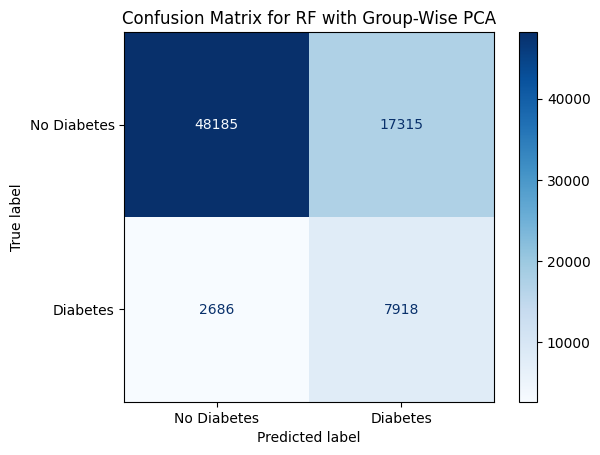

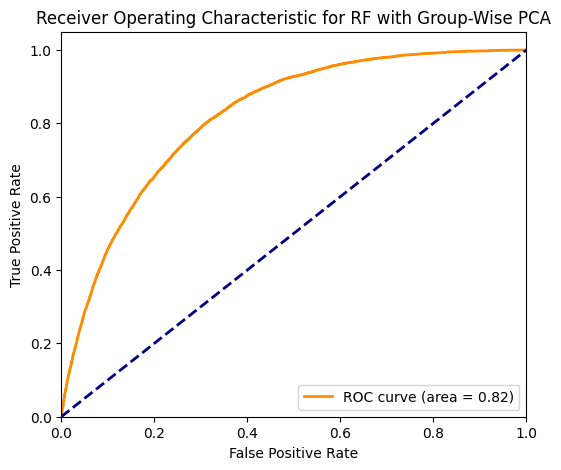

In [29]:
# 1. Define the RF Pipeline
# X_train and X_test are already group-wise PCA transformed, so the pipeline only needs SMOTE and the classifier.
rf_group_pipe = ImbPipeline(steps=[
    ('smote', SMOTE(random_state=RANDOM_STATE)),
    ('classifier', rf_model)
])

# 2. Define the Hyperparameter Search Space (Simplified)
param_grid_rf = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [10, 20, None],
    'classifier__min_samples_split': [2,5]
}

# 3. Randomized Search
rf_search_group = RandomizedSearchCV(
    estimator=rf_group_pipe,
    param_distributions=param_grid_rf,
    n_iter=10,
    scoring='roc_auc',
    cv=cv_folds,
    verbose=0,
    n_jobs=-1,
    random_state=RANDOM_STATE
)

# 4. Train and Evaluate
print("\n--- Training Group-Wise PCA Random Forest ---")
rf_search_group.fit(X_train, y_train)

best_rf_group = rf_search_group.best_estimator_
print(f"Best RF Params: {rf_search_group.best_params_}")

rf_metrics_group = evaluate_model(best_rf_group, X_test, y_test, "RF with Group-Wise PCA")

# Overall Model Comparison
After running the code above for both models (and assuming you run the earlier code for models with standard PCA or no PCA), you can consolidate the results into a table for the final report.

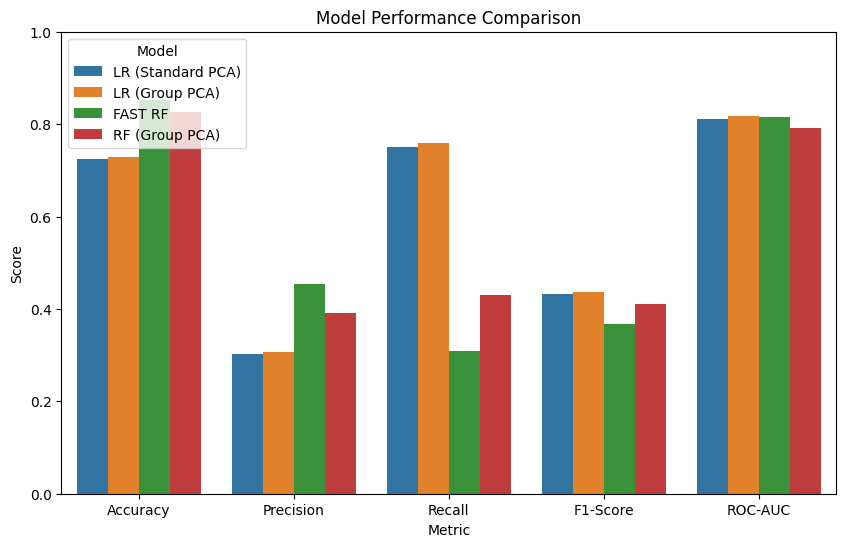

In [41]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# -----------------------------
# Metrics for all models
# -----------------------------
data = {
    "Model": [
        "LR (Standard PCA)",
        "LR (Group PCA)",
        "FAST RF",
        "RF (Group PCA)"
    ],
    "Accuracy": [0.7249, 0.7283, 0.8519, 0.8273],
    "Precision": [0.3033, 0.3074, 0.4541, 0.3911],
    "Recall": [0.7514, 0.7581, 0.3098, 0.4298],
    "F1-Score": [0.4322, 0.4375, 0.3683, 0.4096],
    "ROC-AUC": [0.8106, 0.8172, 0.8157, 0.7918]
}

df = pd.DataFrame(data)

# -----------------------------
# Melt dataframe for seaborn plotting
# -----------------------------
df_melt = df.melt(id_vars='Model', var_name='Metric', value_name='Score')

# -----------------------------
# Plot
# -----------------------------
plt.figure(figsize=(10,6))
sns.barplot(x='Metric', y='Score', hue='Model', data=df_melt)
plt.title("Model Performance Comparison")
plt.ylim(0,1)
plt.ylabel("Score")
plt.xlabel("Metric")
plt.legend(title='Model')
plt.show()


1. Accuracy

FAST RF (≈0.852) has the highest accuracy, followed by RF (Group PCA) (≈0.827).

LR models are slightly lower, around 0.725–0.728.
Interpretation: Random Forest models correctly classify more overall cases, but accuracy alone doesn’t tell the full story, especially with imbalanced data like diabetes.

2. Precision

FAST RF also has the highest precision (≈0.454), meaning when it predicts diabetes, it is more often correct.

LR models are much lower (≈0.303–0.307), and RF (Group PCA) is slightly lower than FAST RF (≈0.391).
Interpretation: RF models are better at avoiding false positives compared to LR.

3. Recall (Sensitivity)

LR (Group PCA) and LR (Standard PCA) have the highest recall (≈0.758–0.751), indicating they catch most true diabetes cases.

FAST RF has the lowest recall (≈0.310), while RF (Group PCA) is slightly better (≈0.430).
Interpretation: LR models are better at identifying all actual diabetes cases, even if they misclassify some non-diabetes cases (trade-off with precision).

4. F1-Score

LR (Group PCA) leads slightly (≈0.438), followed by LR (Standard PCA) (≈0.432).

RF models are lower (≈0.368–0.410).
Interpretation: F1-score balances precision and recall. Here, LR achieves better balance than RF, mainly due to higher recall.

5. ROC-AUC

LR (Group PCA) is slightly highest (≈0.817), followed closely by FAST RF (≈0.816) and LR (Standard PCA) (≈0.811).

RF (Group PCA) is slightly lower (≈0.792).
Interpretation: All models have strong discriminative ability. LR (Group PCA) has the best balance between sensitivity and specificity.

Overall Insights

Logistic Regression (Group PCA):

Best balance of recall and overall discriminative ability (ROC-AUC).

Clinically useful because it identifies most true diabetes cases while remaining interpretable via PCA components.

Random Forest (FAST RF):

Highest accuracy and precision, but low recall.

Good if avoiding false positives is more important than catching every case.

Trade-offs:

LR prioritizes recall, suitable for screening.

RF prioritizes precision/overall accuracy, suitable if interventions are costly or risky.

Group PCA vs Standard PCA (LR):

Minimal difference in metrics, but Group PCA provides better interpretability through clinical feature grouping.